In [13]:
import pandas as pd

In [14]:
df=pd.read_csv('/content/maaslar.csv')
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [15]:
x=df.drop('maas',axis=1)
y=df['maas']
x

,unvan,Egitim Seviyesi
0,Cayci,1
1,Sekreter,2
2,Uzman Yardimcisi,3
3,Uzman,4
4,Proje Yoneticisi,5
5,Sef,6
6,Mudur,7
7,Direktor,8
8,C-level,9
9,CEO,10


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x['unvan']=encoder.fit_transform(x['unvan'])

In [17]:
x

,unvan,Egitim Seviyesi
0,2,1
1,7,2
2,9,3
3,8,4
4,5,5
5,6,6
6,4,7
7,3,8
8,0,9
9,1,10


In [18]:
import numpy as np

In [19]:
x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)

In [20]:
print(x.shape,y.shape)

(20, 1) (10, 1)


In [33]:
from sklearn.model_selection import train_test_split
x = x.reshape(10, 2) # Reshape x to have 10 samples and 2 features
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Training samples:",x_train.shape)
print("Testing samples:",x_test.shape)

Training samples: (8, 2)
Testing samples: (2, 2)


In [22]:
from sklearn.svm import SVR

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf','linear']
}
svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train.ravel())

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: nan


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


In [24]:
svm_reg=SVR(kernel='rbf',C=0.1,gamma=0.001)
svm_reg.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=0.1, gamma=0.001)

In [25]:
y_pred=svm_reg.predict(x_test)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
mse=mean_squared_error(y_test,y_pred)
mse

179124526.47564036

In [28]:
rmse=np.sqrt(mse)
rmse

np.float64(13383.741124051987)

In [30]:
r2=r2_score(y_test,y_pred)
r2

-0.4153049005482694

In [31]:
import matplotlib.pyplot as plt

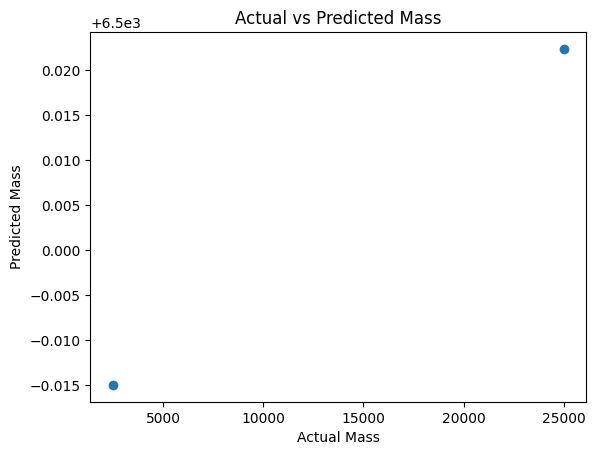

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mass')
plt.ylabel('Predicted Mass')
plt.title('Actual vs Predicted Mass')
plt.show()